# KNN (K-Neared Neighbors)

## Imports

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Reading Data

In [185]:
df = pd.read_csv("teleCust1000t.csv")
print(df.shape, "\n")
print(df["custcat"].value_counts(), "\n")
df.head()

(1000, 12) 

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64 



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Histogram

array([[<Axes: title={'center': 'income'}>]], dtype=object)

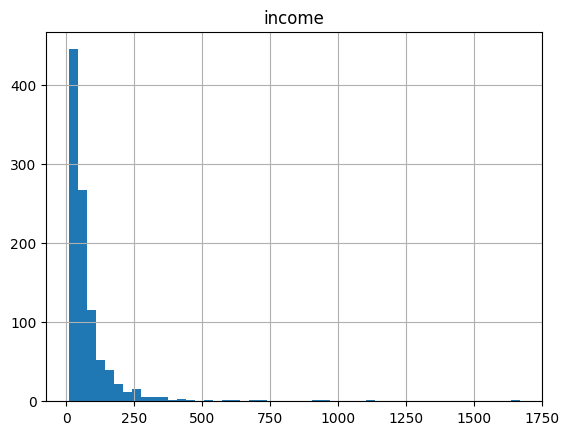

In [186]:
df.hist(column="income", bins=50)

## Separating Data

In [187]:
print(df.columns)
x_data = df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside"]]
y_data = df[["custcat"]]

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


## Normalizing Data

In [188]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_data) # scaler calculates mean and std of x_data
x_data = scaler.transform(x_data.astype(float)) # new_x = (x_data - mean) / std --> new_mean = 0 & new_std = 1
x_data

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]], shape=(1000, 11))

## Splitting Data to Train and Test Data

In [189]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)
print(f"Train Data: x: {x_train.shape}, y: {y_train.shape}")
print(f"Test Data: x: {x_test.shape}, y: {y_test.shape}")

Train Data: x: (800, 11), y: (800, 1)
Test Data: x: (200, 11), y: (200, 1)


## K-Nearest Neighbor Classifying (KNN Classifying)

In [190]:
from sklearn.neighbors import  KNeighborsClassifier

k = 4
neighbors = KNeighborsClassifier(k).fit(x_train, y_train.values.ravel())
predicted_y = neighbors.predict(x_test)
print(y_test[0:5])
print(predicted_y[0:5])

     custcat
698        4
577        1
763        1
790        2
520        4
[1 1 3 2 4]


## Accuracy Evaluation

In [191]:
from sklearn.metrics import accuracy_score

predicted_y_train = neighbors.predict(x_train)
predicted_y_test = neighbors.predict(x_test)

print(f"Train Data Accuracy: {accuracy_score(y_train, predicted_y_train)}")
print(f"Test Data Accuracy: {accuracy_score(y_test, predicted_y_test)}")

Train Data Accuracy: 0.5475
Test Data Accuracy: 0.32


## Finding The Best K

In [192]:
Ks = 10

mean_accuracies = np.zeros(Ks - 1)
std_accuracies = np.zeros(Ks - 1)

for k in range(1, Ks):
    neighbors = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train.values.ravel())
    predicted_y = neighbors.predict(x_test)
    test_y_1D = y_test.values.ravel()

    mean_accuracies[k - 1] = accuracy_score(y_test, predicted_y)
    std_accuracies[k - 1] = (np.std(predicted_y == test_y_1D)) / (np.sqrt(predicted_y.shape[0]))


## Plotting The Model Accuracy for Different Numbers of Neighbors

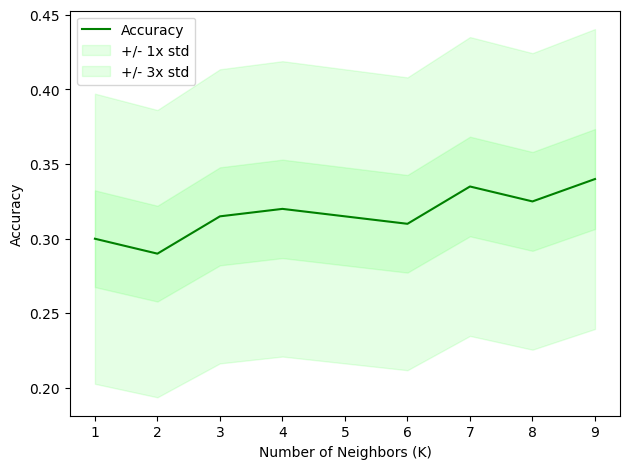

The Best Accuracy is 0.34 with k = 9


In [193]:
plt.plot(range(1, Ks), mean_accuracies, "g")

plt.fill_between(range(1, Ks), mean_accuracies - std_accuracies, mean_accuracies + std_accuracies, alpha=0.1, color="#00ff00")
plt.fill_between(range(1, Ks), mean_accuracies - 3 * std_accuracies, mean_accuracies + 3 * std_accuracies, alpha=0.1, color="#00ff00")

plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.legend(("Accuracy", "+/- 1x std", "+/- 3x std"))
plt.tight_layout()
plt.show()

print(f"The Best Accuracy is {mean_accuracies.max()} with k = {mean_accuracies.argmax() + 1}")

## Predict a Data

In [194]:
record = np.array([3, 11, 33, 1, 7, 136.000, 5, 5, 0.000, 0, 6]).reshape(1, -1)
scaled_record = scaler.transform(record.astype(float))

predicted_y = neighbors.predict(scaled_record)
predicted_y[0]

/Users/mac/Documents/programming/Machine-Learning/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(4)